In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [12]:
def calculate_sr(state: BatsmanState) -> BatsmanState:

    sr = (state['runs']/state['balls'])*100
    return {'sr': sr}

In [13]:
def calculate_bpb(state: BatsmanState) -> BatsmanState:

    bpb = state['balls']/(state['fours'] + state['sixes'])

    return {'bpb': bpb}

In [14]:
def calculate_boundary_percent(state: BatsmanState):

    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'boundary_percent': boundary_percent}

In [15]:
def summary(state: BatsmanState):

    summary = f"""
        Strike Rate - {state['sr']} \n
        Balls per boundary - {state['bpb']} \n
        Boundary percent - {state['boundary_percent']}
        """
    
    return {'summary': summary}

In [16]:
graph = StateGraph(BatsmanState)


graph.add_node('calculate_strike_rate', calculate_sr)
graph.add_node('calculate_balls_per_boundary', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)


graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_balls_per_boundary')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_strike_rate','summary')
graph.add_edge('calculate_balls_per_boundary','summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary', END)




In [17]:
workflow = graph.compile()

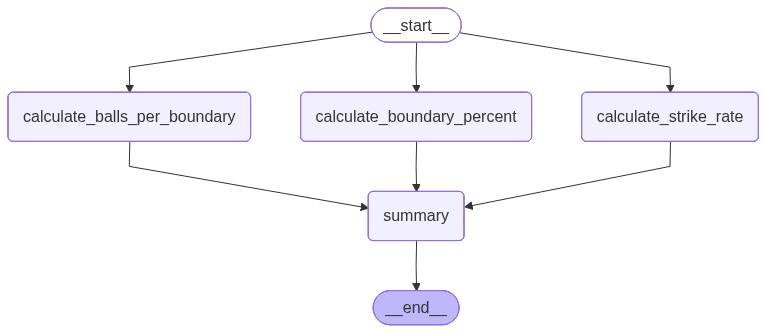

In [18]:
# to visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [21]:
initial_state = {'runs': 87, 'balls': 73, 'fours': 10, 'sixes': 3}

In [22]:
final_state = workflow.invoke(initial_state)

In [23]:
final_state

{'runs': 87,
 'balls': 73,
 'fours': 10,
 'sixes': 3,
 'sr': 119.17808219178083,
 'bpb': 5.615384615384615,
 'boundary_percent': 66.66666666666666,
 'summary': '\n        Strike Rate - 119.17808219178083 \n\n        Balls per boundary - 5.615384615384615 \n\n        Boundary percent - 66.66666666666666\n        '}